Data set from Kaggle https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset related to the patient's age, sex, medical history, and physical condition, such as exercise-induced angina, chest pain type, number of major vessels, resting blood pressure, cholesterol level, fasting blood sugar level, electrocardiographic results, maximum heart rate achieved, and target.

The "target" feature is the dependent variable and indicates whether the patient is at high risk or low risk of having a heart attack. The value "0" indicates a lower chance of a heart attack, while the value "1" indicates a higher chance.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotnine as pn
import matplotlib.pyplot as plt
import graphviz
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import metrics

from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot # Leaving this to avoid lots of code re-writing.
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


/apps/python/3.8/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.


In [2]:
df= pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


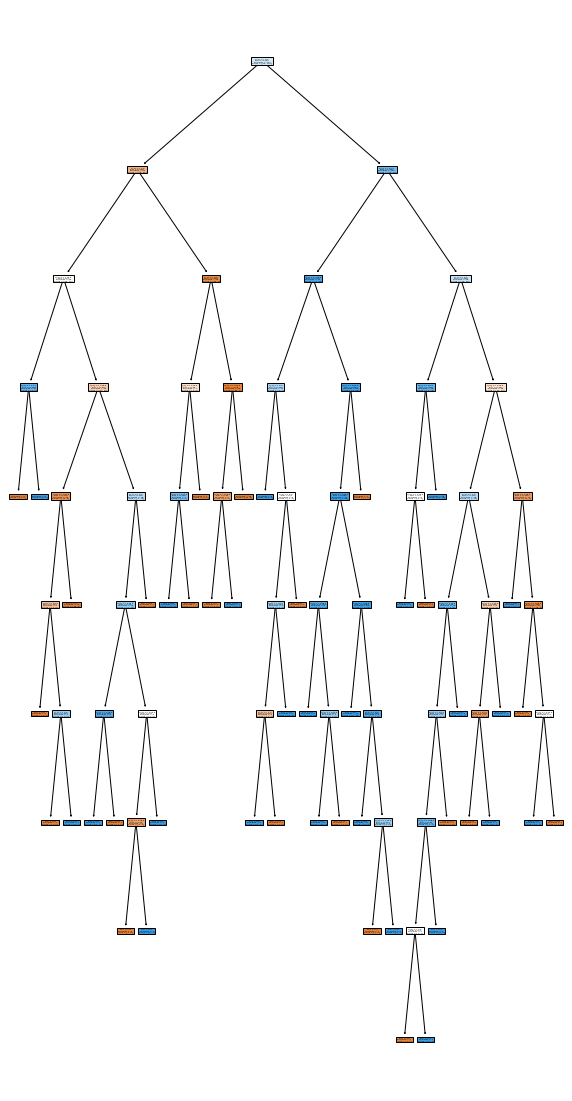

In [52]:
X = df[['age', 'sex', 'exng', 'caa', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh']]
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model =Pipeline([ 
    #('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())
])
model.fit(X_train, y_train)

# Visualize the dept 4 tree using plot_tree
fig = plt.figure(figsize=(10,20))
annotations = plot_tree(model['tree'], filled=True) # Assign text annotations to variable to not print

In [53]:
print(f'Train Accuracy: {accuracy_score( model.predict(X_train),y_train)}')
print(f'Test Accuracy: {accuracy_score( model.predict(X_test),y_test)}')


Train Accuracy: 1.0
Test Accuracy: 0.7582417582417582


In [54]:
path = model['tree'].cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00304155 0.00428816 0.00459603 0.00503145 0.00550314
 0.00600343 0.00707547 0.00714694 0.00754717 0.00786164 0.00820231
 0.00868314 0.00870021 0.00875919 0.00909347 0.01179245 0.01341719
 0.01543739 0.01688822 0.01698113 0.02811106 0.03466802 0.11819657]


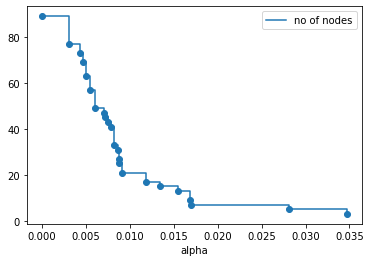

In [55]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]

plt.scatter(ccp_alphas,node_counts)
plt.xlabel("alpha")

plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")

plt.legend()
plt.show()

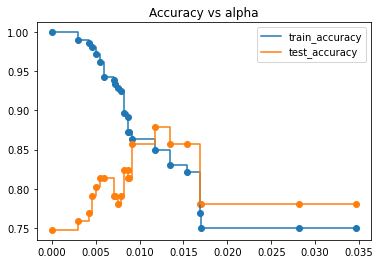

Best accuracy of 0.8791208791208791 obtained at alpha 0.01179245283018868


In [56]:
train_acc = []
test_acc = []
best_acc=0
best_alpha=0
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))
    if accuracy_score(y_test_pred,y_test) > best_acc:
        best_acc=accuracy_score(y_test_pred,y_test)
        best_alpha=c.ccp_alpha

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()
print(f'Best accuracy of {best_acc} obtained at alpha {best_alpha}')

In [57]:
clf_ = DecisionTreeClassifier(ccp_alpha=best_alpha)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.8490566037735849
Test score 0.8791208791208791


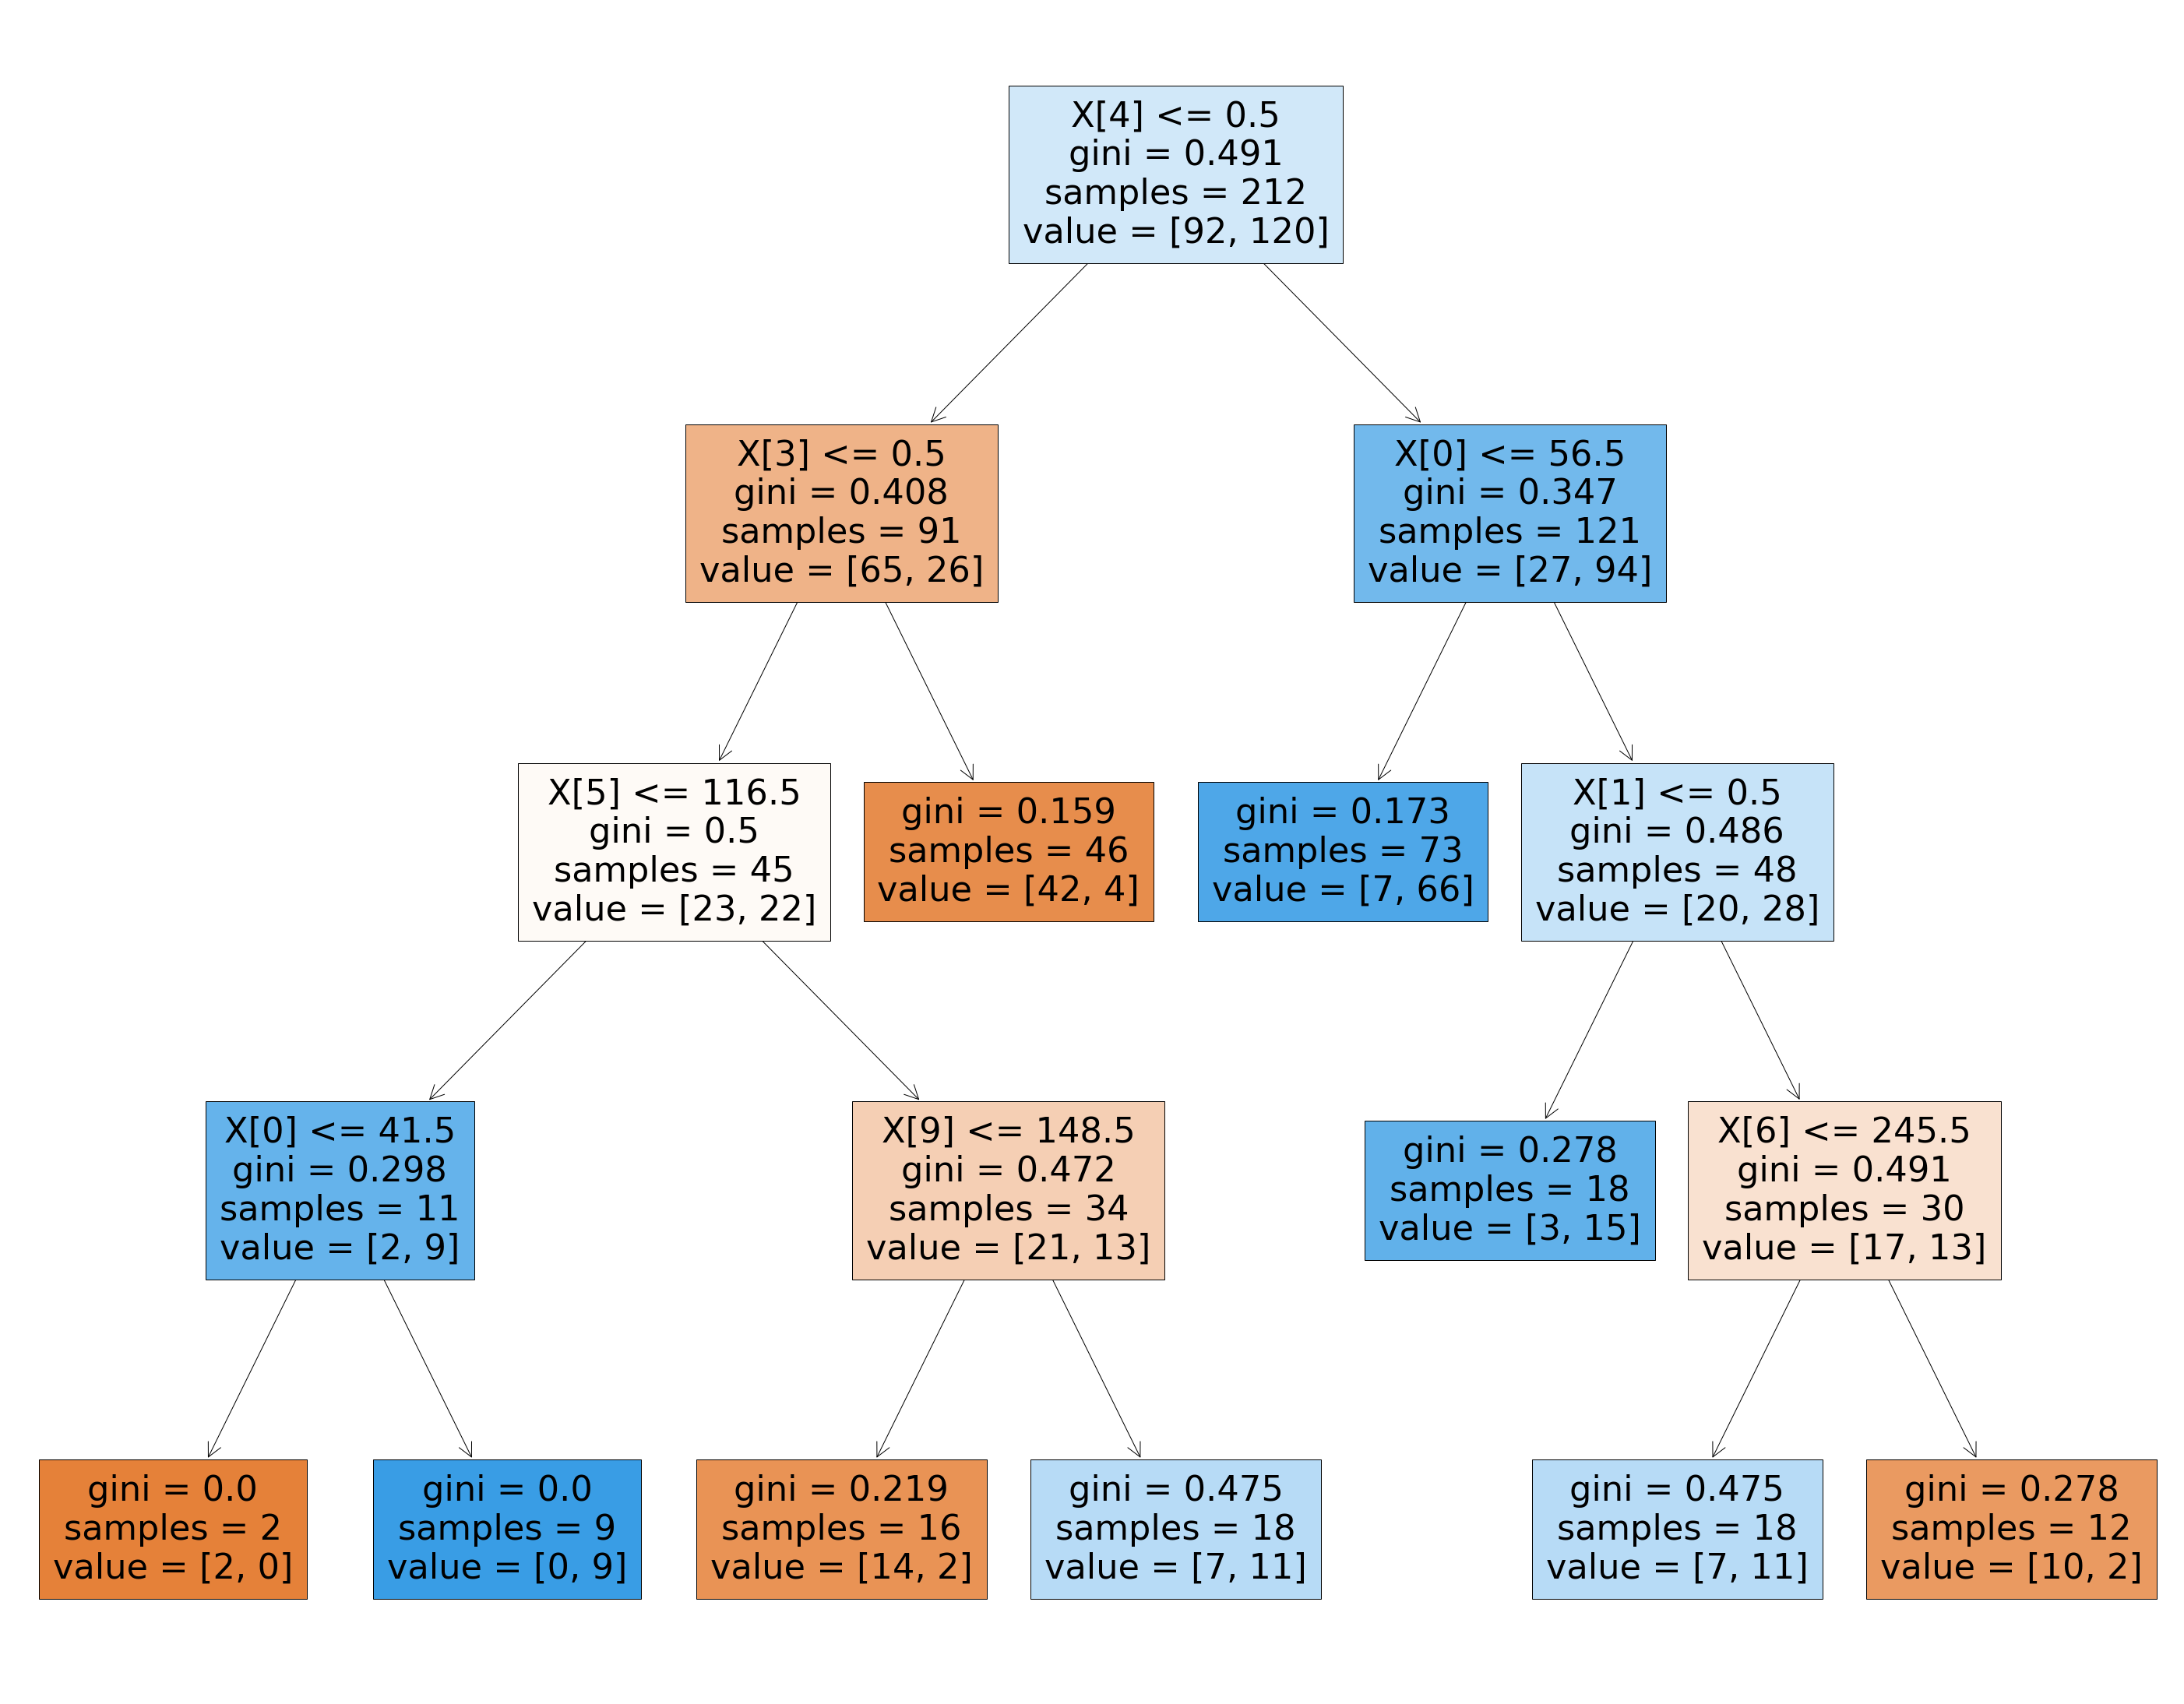

In [58]:
fig = plt.figure(figsize=(50,40))
annotations = plot_tree(clf_, filled=True) 

In [61]:
new_data = np.array([[50, 0, 1, 0, 2, 120, 220, 0, 1, 150]])
prediction = model.predict(new_data)
print(prediction)

[1]
